In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import math

from sklearn.neighbors import KernelDensity

import scipy.integrate as integrate
from sklearn.kernel_ridge import KernelRidge

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

In [2]:
mu1, sigma1 = 3.0, 1.0
mu2, sigma2 = 8.0, 1.5

def sample_points():
    s1 = np.random.normal(mu1, sigma1, 50)

    s2 = np.random.normal(mu2, sigma2, 50)

    return list(s1) + list(s2)

In [3]:
# generate points used to plot
x_plot = np.linspace(0, 12, 100)

# generate points and keep a subset of them
x = sample_points()

colors = ['red', 'blue', 'orange', 'green']
lw = 2


In [4]:
def kernel(x1, x2, bi = 2.0):
    z = (x1 - x2) / bi
    return (1.0/math.sqrt(2.0 * 3.14)) * math.exp((-1.0/2.0)*(z**2))

def fb(xx, data, bi):
    return (1/(len(data)*bi)) * sum([kernel(xx, xi, bi) for xi in data])

def fbi(i, data, bi):
    data_minus_i = []
    for ii in range(len(data)):
        if i != ii:
            data_minus_i.append(data[ii])
    return (1/(len(data_minus_i)*bi)) * sum([kernel(data[i], xi, bi) for xi in data_minus_i])


def sum_pdf(x):
    result = []
    for i in range(len(x)):
        result.append((sp.stats.norm.pdf(x, mu1, sigma1)[i] + sp.stats.norm.pdf(x, mu2, sigma2)[i])/2.0)
        #result.append(sp.stats.norm.pdf(x, mu1, sigma1)[i])
    return result

In [5]:
b = np.linspace(0.01, 3.0, 100)

score = []
for bi in b:
    def fb2(xx):
        return fb(xx, x, bi)**2

    s = integrate.quad(fb2, -np.inf, np.inf)[0] - 2.0*np.mean([fbi(i, x, bi) for i in range(len(x))])
    score.append(s)

/var/folders/3z/gy9dgz294xvgty7v8hhlbv0h0000gn/T/ipykernel_52603/1844911469.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  s = integrate.quad(fb2, -np.inf, np.inf)[0] - 2.0*np.mean([fbi(i, x, bi) for i in range(len(x))])
/var/folders/3z/gy9dgz294xvgty7v8hhlbv0h0000gn/T/ipykernel_52603/1844911469.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  s = integrate.quad(fb2, -np.inf, np.inf)[0] - 2.0*np.mean([fbi(i, x, bi) for i in range(len(x))])


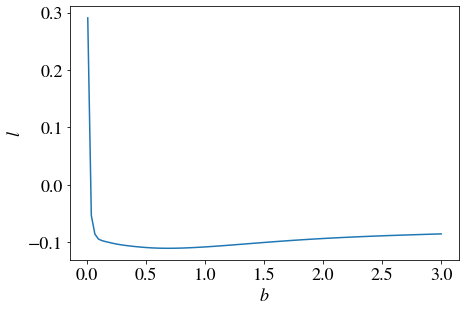

In [6]:
plt.figure(1)
plt.plot(b,score)
plt.xlabel("$b$")
plt.ylabel("$l$")
plt.tight_layout()
plt.xticks(np.arange(0, 3.5, 0.5))
#plt.show()
fig1 = plt.gcf()
fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)

In [8]:

#fig1.savefig('../../Illustrations/density-estimation-loss.eps', format='eps', dpi=1000, bbox_inches = 'tight', pad_inches = 0)
#fig1.savefig('../../Illustrations/density-estimation-loss.pdf', format='pdf', dpi=1000, bbox_inches = 'tight', pad_inches = 0)
#fig1.savefig('../../Illustrations/density-estimation-loss.png', dpi=1000, bbox_inches = 'tight', pad_inches = 0)

minb = [bi for bi, s in zip(b, score) if s == min(score)][0]
print(minb)

0.7046464646464647


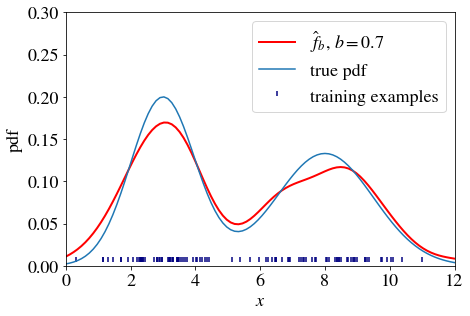

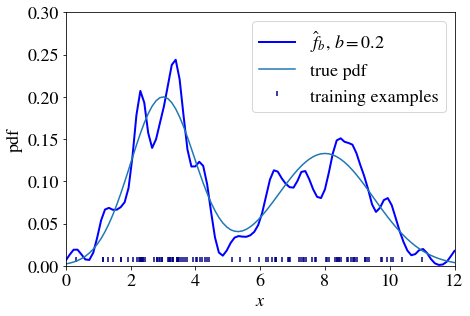

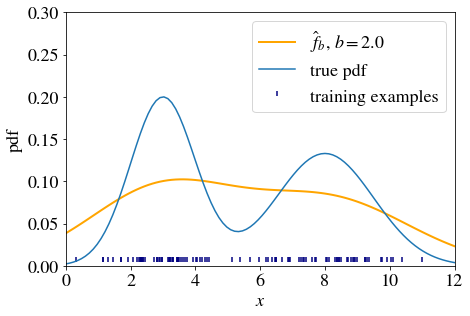

In [9]:
for count, degree in enumerate([round(minb, 2)] + [0.2, 2.0]):
    plt.figure(count+2)
    axes = plt.gca()
    axes.set_xlim([0,12])
    axes.set_ylim([0,0.3])
    plt.xlabel("$x$")
    plt.ylabel("pdf")
    plt.scatter(x, [0.005] * len(x), color='navy', s=30, marker=2, label="training examples")
    plt.plot(x_plot, [fb(xp ,x, degree) for xp in x_plot], color=colors[count], linewidth=lw, label="$\\hat{f}_b$, $b = " + str(degree) + "$")
    plt.plot(x_plot,sum_pdf(x_plot), label="true pdf")

    plt.legend(loc='upper right')
    plt.tight_layout()

    fig1 = plt.gcf()
    fig1.subplots_adjust(top = 0.98, bottom = 0.1, right = 0.98, left = 0.08, hspace = 0, wspace = 0)
    #fig1.savefig('../../Illustrations/density-estimation-' + str(count) + '.eps', format='eps', dpi=1000, bbox_inches = 'tight', pad_inches = 0)
    #fig1.savefig('../../Illustrations/density-estimation-' + str(count) + '.pdf', format='pdf', dpi=1000, bbox_inches = 'tight', pad_inches = 0)
    #fig1.savefig('../../Illustrations/density-estimation-' + str(count) + '.png', dpi=1000, bbox_inches = 'tight', pad_inches = 0)
    plt.show()